## Import packages, mount and access data

In [1]:
!pip install nba_api

# Import packages and mount drive
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import sklearn as sk
import seaborn as sns
import requests
import warnings

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

warnings.filterwarnings('ignore')
drive.mount("/content/drive")

# Validate the file location
!ls "/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project"

# Adjust pandas settings to display all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 4.6 MB/s eta 0:00:00
Mounted at /content/drive
 2023_nba_player_stats.csv
 3_man.csv
 5_man.csv
'DSO 579-Final Project Paper.gdoc'
'DSO 579 NBA 5-Man Lineups.gslides'
'DSO 579 NBA Win Prediction.ipynb'
 lineups_data.xlsx
'LV Raiders - Jonathan Meeting Notes 11 11 24.gdoc'
 manual_lineups.xlsx
'Match_up_and_date (1).gsheet'
 Match_up_and_date.csv
 Match_up_and_date.gsheet
 merged_data.xlsx
'NBA 23-24 Season Data.gsheet'
'NBA 23-24 Season Data - Lakers.csv'
'nba 3-man_dummy_combo.ipynb'
'nba 3-man_player_combo.ipynb'
'nba 5-man DEF.ipynb'
'nba 5-man_dummy_combo.ipynb'
'nba 5-man no dummy.ipynb'
'nba 5-man_player_combo.ipynb'
 nba_lineups.ipynb
'NBA Player Performance Win Prediction Proposal.gdoc'
'NBA Players Dataset 2023.zip'
'Play making nba 5-man.ipynb'
'Slide Templates'
 X_final_output.xlsx


## Accessing Scraped 3-man Data

In [2]:
df_dates = pd.read_csv("/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project/Match_up_and_date.csv")
df_dates = df_dates.sort_values(by='GAME DATE', ascending= True)
df_dates.head()

,MATCH UP,GAME DATE,W/L
81,LAL @ DEN,2023-10-24,0
80,LAL vs. PHX,2023-10-26,1
79,LAL @ SAC,2023-10-29,0
78,LAL vs. ORL,2023-10-30,1
77,LAL vs. LAC,2023-11-01,1


In [3]:
file_path = "/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project/3_man.csv"
data = pd.read_csv(file_path)
data.head()

,LINEUPS,TEAM,GP,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,DATE
0,A. Davis - T. Prince - A. Reaves,LAL,1.0,28.0,105.3,132.2,-26.9,61.9,1.63,16.3,30.3,67.9,47.5,0.1,46.2,50.8,100.26,35.4,10/24/2023
1,D. Russell - T. Prince - A. Reaves,LAL,1.0,21.0,117.4,122.2,-4.8,63.2,3.00,18.8,27.3,68.0,48.9,0.1,56.4,59.8,105.17,48.6,10/24/2023
2,A. Davis - D. Russell - A. Reaves,LAL,1.0,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,10/24/2023
3,A. Davis - D. Russell - T. Prince,LAL,1.0,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,10/24/2023
4,L. James - A. Davis - D. Russell,LAL,1.0,18.0,125.6,120.5,5.1,64.7,3.67,20.8,16.7,72.2,44.4,0.1,63.6,65.5,103.62,48.7,10/24/2023


In [4]:
# Ensure DATE format matches between the two dataframes
df_dates['GAME DATE'] = pd.to_datetime(df_dates['GAME DATE'])
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract only the opposing team's name from the MATCH UP column
df_dates['OPPOSING TEAM'] = df_dates['MATCH UP'].str.split(' ').str[-1]

# Merge the dataframes on the DATE columns
combined_df = pd.merge(
    data,
    df_dates[['GAME DATE', 'OPPOSING TEAM', 'W/L']],  # Include relevant columns
    left_on='DATE',
    right_on='GAME DATE',
    how='left'
)

# Drop unnecessary GAME DATE column if needed
combined_df.drop(columns=['GAME DATE'], inplace=True)

# Print the combined DataFrame
combined_df

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# Identify rows with any NaN values
rows_with_nan = combined_df[combined_df.isnull().any(axis=1)]

# Display the rows with NaN
rows_with_nan

,LINEUPS,TEAM,GP,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,DATE,OPPOSING TEAM,W/L
140,A. Davis - C. Wood - T. Prince,LAL,1.0,2.0,33.3,150.0,-116.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.33,-114.3,2023-10-26,PHX,1
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.36,35.3,2023-10-26,PHX,1
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.97,-28.6,2023-10-26,PHX,1
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.95,0.0,2023-10-26,PHX,1
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.95,0.0,2023-10-26,PHX,1
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.33,-114.3,2023-10-26,PHX,1
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.33,-114.3,2023-10-26,PHX,1
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.33,-114.3,2023-10-26,PHX,1
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.49,22.2,2023-10-26,PHX,1
149,NaN,NaN,1.0,1.0,100.0,100.0,0.0,100.0,0.0,33.3,0.0,100.0,50.0,0.0,50.0,50.0,90.00,50.0,2023-10-26,PHX,1


In [7]:
# Drop rows with any NaN values
combined_df = combined_df.dropna()

# Display the updated DataFrame
nan_row_check_post_clean = combined_df[combined_df.isnull().any(axis=1)]
nan_row_check_post_clean

,LINEUPS,TEAM,GP,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,DATE,OPPOSING TEAM,W/L


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5515 entries, 0 to 5532
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LINEUPS        5515 non-null   object        
 1   TEAM           5515 non-null   object        
 2   GP             5515 non-null   float64       
 3   MIN            5515 non-null   float64       
 4   OFFRTG         5515 non-null   float64       
 5   DEFRTG         5515 non-null   float64       
 6   NETRTG         5515 non-null   float64       
 7   AST%           5515 non-null   float64       
 8   AST/TO         5515 non-null   float64       
 9   AST RATIO      5515 non-null   float64       
 10  OREB%          5515 non-null   float64       
 11  DREB%          5515 non-null   float64       
 12  REB%           5515 non-null   float64       
 13  TO RATIO       5515 non-null   float64       
 14  EFG%           5515 non-null   float64       
 15  TS%            5515 non-nu

In [9]:
combined_df.describe()

,GP,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,DATE,W/L
count,5515.0,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515.000000,5515,5515.000000
mean,1.0,7.090662,104.644279,109.835848,-5.192167,57.380218,1.509768,17.069374,21.061269,67.684569,47.396446,0.138078,54.051097,57.568196,115.284988,45.966600,2024-01-17 21:53:37.479601152,0.578604
min,1.0,0.000000,0.000000,0.000000,-300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.380000,-1300.000000,2023-10-24 00:00:00,0.000000
25%,1.0,2.000000,80.000000,85.700000,-36.400000,42.900000,0.000000,11.100000,0.000000,55.600000,38.500000,0.000000,40.000000,45.250000,98.410000,31.100000,2023-12-02 00:00:00,0.000000
50%,1.0,5.000000,108.900000,111.100000,0.000000,63.600000,1.000000,18.500000,18.200000,72.700000,50.000000,0.100000,55.000000,59.500000,104.870000,50.000000,2024-01-17 00:00:00,1.000000
75%,1.0,9.000000,132.600000,133.300000,30.300000,79.050000,2.200000,23.600000,33.300000,90.000000,59.100000,0.200000,68.200000,70.900000,113.190000,67.100000,2024-03-02 00:00:00,1.000000
max,1.0,36.000000,300.000000,300.000000,300.000000,100.000000,20.000000,50.000000,100.000000,100.000000,100.000000,1.000000,150.000000,150.000000,7200.000000,700.000000,2024-04-14 00:00:00,1.000000
std,0.0,6.526677,48.636382,48.183258,66.269836,32.120720,1.845799,10.251351,22.250561,29.486361,21.342048,0.131964,27.618253,26.131273,118.690561,77.738888,NaN,0.493828


## Data Cleaning

In [10]:
combined_df.head()

,LINEUPS,TEAM,GP,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,DATE,OPPOSING TEAM,W/L
0,A. Davis - T. Prince - A. Reaves,LAL,1.0,28.0,105.3,132.2,-26.9,61.9,1.63,16.3,30.3,67.9,47.5,0.1,46.2,50.8,100.26,35.4,2023-10-24,DEN,0
1,D. Russell - T. Prince - A. Reaves,LAL,1.0,21.0,117.4,122.2,-4.8,63.2,3.00,18.8,27.3,68.0,48.9,0.1,56.4,59.8,105.17,48.6,2023-10-24,DEN,0
2,A. Davis - D. Russell - A. Reaves,LAL,1.0,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,2023-10-24,DEN,0
3,A. Davis - D. Russell - T. Prince,LAL,1.0,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,2023-10-24,DEN,0
4,L. James - A. Davis - D. Russell,LAL,1.0,18.0,125.6,120.5,5.1,64.7,3.67,20.8,16.7,72.2,44.4,0.1,63.6,65.5,103.62,48.7,2023-10-24,DEN,0


In [11]:
#To list the columns in the data
combined_df.columns

Index(['LINEUPS', 'TEAM', 'GP', 'MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%',
       'AST/TO', 'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%',
       'TS%', 'PACE', 'PIE', 'DATE', 'OPPOSING TEAM', 'W/L'],
      dtype='object')

In [12]:
#List of columns
manual_drop = ["TEAM", "GP", "DATE", "OPPOSING TEAM"]

# Drop the specified columns
cleaned_data = combined_df.drop(columns=manual_drop, errors='ignore')
cleaned_data.head()

,LINEUPS,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,W/L
0,A. Davis - T. Prince - A. Reaves,28.0,105.3,132.2,-26.9,61.9,1.63,16.3,30.3,67.9,47.5,0.1,46.2,50.8,100.26,35.4,0
1,D. Russell - T. Prince - A. Reaves,21.0,117.4,122.2,-4.8,63.2,3.00,18.8,27.3,68.0,48.9,0.1,56.4,59.8,105.17,48.6,0
2,A. Davis - D. Russell - A. Reaves,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,0
3,A. Davis - D. Russell - T. Prince,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,0
4,L. James - A. Davis - D. Russell,18.0,125.6,120.5,5.1,64.7,3.67,20.8,16.7,72.2,44.4,0.1,63.6,65.5,103.62,48.7,0


In [13]:
# Step 2: Initialize a set to store unique player names
unique_players = set()

# Step 3: Iterate through the LINEUPS column, split on ' - ', and add names to the set
cleaned_data['LINEUPS'].str.split(' - ').apply(lambda lineup: unique_players.update(lineup))

unique_players

{'A. Davis',
 'A. Fudge',
 'A. Reaves',
 'C. Castleton',
 'C. Reddish',
 'C. Wood',
 'D. Hodge',
 'D. Russell',
 'D. Windler',
 'G. Vincent',
 'H. Giles III',
 'J. Hayes',
 'J. Hood-Schifino',
 'J. Vanderbilt',
 'L. James',
 'M. Christie',
 'M. Lewis',
 'R. Hachimura',
 'S. Dinwiddie',
 'S. Mays',
 'T. Prince'}

In [15]:
unique_players = set()
cleaned_data['LINEUPS'].str.split(' - ').apply(lambda lineup: unique_players.update(lineup))
unique_players = sorted(unique_players)

# Step 3: Create binary columns for each player
for player in unique_players:
    cleaned_data[player] = cleaned_data['LINEUPS'].apply(lambda lineup: 1 if player in lineup.split(' - ') else 0)

cleaned_data

Output hidden; open in https://colab.research.google.com to view.

In [16]:
dummied_data = cleaned_data.drop(columns="LINEUPS", errors='ignore')
dummied_data.head()
dummied_data.shape

(5515, 37)

In [17]:
dummied_data.rename(columns={'W/L': 'WIN'}, inplace=True)
dummied_data.head()

,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,WIN,A. Davis,A. Fudge,A. Reaves,C. Castleton,C. Reddish,C. Wood,D. Hodge,D. Russell,D. Windler,G. Vincent,H. Giles III,J. Hayes,J. Hood-Schifino,J. Vanderbilt,L. James,M. Christie,M. Lewis,R. Hachimura,S. Dinwiddie,S. Mays,T. Prince
0,28.0,105.3,132.2,-26.9,61.9,1.63,16.3,30.3,67.9,47.5,0.1,46.2,50.8,100.26,35.4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,21.0,117.4,122.2,-4.8,63.2,3.00,18.8,27.3,68.0,48.9,0.1,56.4,59.8,105.17,48.6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19.0,120.0,132.5,-12.5,62.5,2.50,18.5,22.2,65.0,44.7,0.1,59.4,62.9,102.95,44.7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18.0,125.6,120.5,5.1,64.7,3.67,20.8,16.7,72.2,44.4,0.1,63.6,65.5,103.62,48.7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
dummied_data.columns

Index(['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO',
       'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%', 'PACE', 'PIE',
       'WIN', 'A. Davis', 'A. Fudge', 'A. Reaves', 'C. Castleton',
       'C. Reddish', 'C. Wood', 'D. Hodge', 'D. Russell', 'D. Windler',
       'G. Vincent', 'H. Giles III', 'J. Hayes', 'J. Hood-Schifino',
       'J. Vanderbilt', 'L. James', 'M. Christie', 'M. Lewis', 'R. Hachimura',
       'S. Dinwiddie', 'S. Mays', 'T. Prince'],
      dtype='object')

In [19]:
numericals = dummied_data[['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE', 'WIN']].corr()
numericals

,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,WIN
MIN,1.000000,0.188122,0.066810,0.089504,0.229006,0.473409,0.249630,0.100753,0.178376,0.107001,-0.050291,0.125012,0.122628,-0.103503,0.080198,-0.019261
OFFRTG,0.188122,1.000000,0.063032,0.688090,0.401280,0.273019,0.659188,0.206565,0.114258,0.274705,-0.286253,0.811369,0.851791,-0.155321,0.401065,0.074514
DEFRTG,0.066810,0.063032,1.000000,-0.680811,0.063369,0.043739,0.037860,0.013686,-0.305540,-0.321425,-0.015694,0.076663,0.100883,-0.133385,-0.261055,-0.142283
NETRTG,0.089504,0.688090,-0.680811,1.000000,0.248445,0.168585,0.456265,0.141667,0.306023,0.435328,-0.198678,0.539735,0.551793,-0.017012,0.484149,0.158144
AST%,0.229006,0.401280,0.063369,0.248445,1.000000,0.337837,0.835657,0.003110,0.178826,0.145188,-0.035289,0.456453,0.426620,-0.133955,0.207402,0.018658
AST/TO,0.473409,0.273019,0.043739,0.168585,0.337837,1.000000,0.406384,0.060491,0.165020,0.124813,-0.093422,0.234002,0.217842,-0.075188,0.114852,0.022368
AST RATIO,0.249630,0.659188,0.037860,0.456265,0.835657,0.406384,1.000000,-0.040911,0.152750,0.169644,-0.155058,0.680295,0.629472,-0.129584,0.275556,0.055636
OREB%,0.100753,0.206565,0.013686,0.141667,0.003110,0.060491,-0.040911,1.000000,0.099757,0.491738,0.072832,0.006294,0.002347,-0.076442,0.083828,0.065863
DREB%,0.178376,0.114258,-0.305540,0.306023,0.178826,0.165020,0.152750,0.099757,1.000000,0.742952,0.029106,0.140872,0.143977,-0.127040,0.071060,0.011120
REB%,0.107001,0.274705,-0.321425,0.435328,0.145188,0.124813,0.169644,0.491738,0.742952,1.000000,0.122108,0.279223,0.282785,-0.122065,0.179060,0.094440


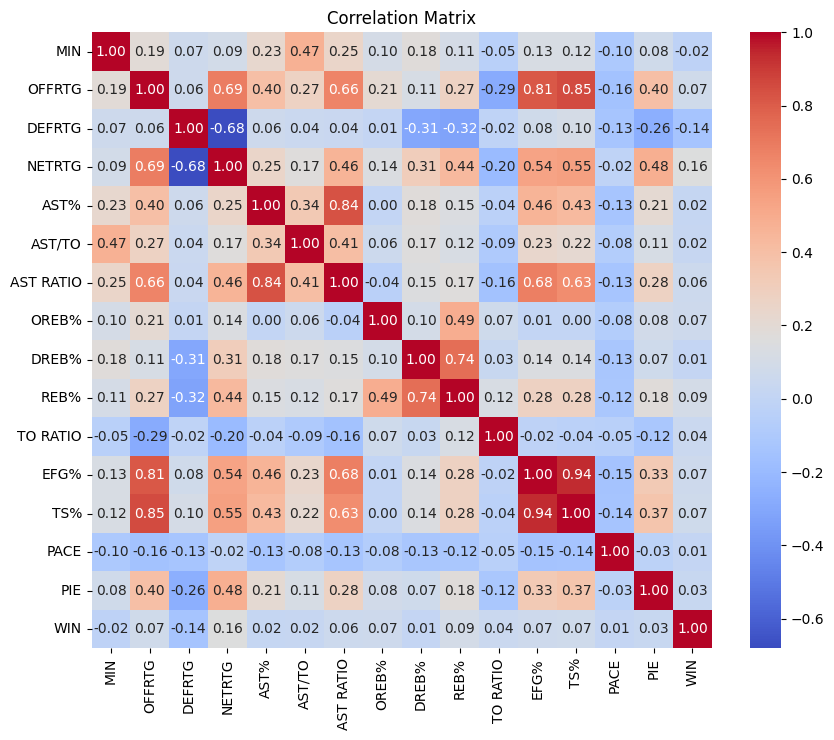

In [20]:
import seaborn as sns
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numericals, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
yes = dummied_data[dummied_data["WIN"] == 1]
no = dummied_data[dummied_data["WIN"] == 0]

In [22]:
filtered_data = dummied_data

In [23]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Split numerical and categorical variables
numerical_features = ['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE']
#categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Plot the distribution of numerical features
for feature in numerical_features:
    fig = px.histogram(filtered_data, x=feature, title=f"Distribution of {feature}", nbins=50)
    fig.show()

    # Plot the distribution of numerical features By Heart Disease
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=yes[feature], nbinsx=50, opacity=0.5, name='Yes', marker_color='red' ))
    fig.add_trace(go.Histogram(x=no[feature], nbinsx=50, opacity=0.5, name='No', marker_color='blue' ))
    fig.update_layout(title=f"Distribution of {feature} By Win",
                      xaxis_title=feature, yaxis_title="Count", barmode='group')
    fig.show()

In [26]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define features and target
X = filtered_data.drop(columns=['WIN'])  # Features
y = filtered_data['WIN']  # Target

# Identify categorical and continuous features
categorical_features = ['A. Davis', 'A. Fudge', 'A. Reaves', 'C. Castleton',
       'C. Reddish', 'C. Wood', 'D. Hodge', 'D. Russell', 'D. Windler',
       'G. Vincent', 'H. Giles III', 'J. Hayes', 'J. Hood-Schifino',
       'J. Vanderbilt', 'L. James', 'M. Christie', 'M. Lewis', 'R. Hachimura',
       'S. Dinwiddie', 'S. Mays', 'T. Prince']
continuous_features = ['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features)])

# Apply transformations to the numerical features
X_transformed = preprocessor.fit_transform(X)

# Create the DataFrame for transformed numerical features
X_transformed_df = pd.DataFrame(X_transformed, columns=continuous_features, index=X.index)

# Bring back the categorical features
X_categorical = X[categorical_features]

# Concatenate the numerical and categorical DataFrames
X_final = pd.concat([X_transformed_df, X_categorical], axis=1)

# Display the final DataFrame
X_final.head()

,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,A. Davis,A. Fudge,A. Reaves,C. Castleton,C. Reddish,C. Wood,D. Hodge,D. Russell,D. Windler,G. Vincent,H. Giles III,J. Hayes,J. Hood-Schifino,J. Vanderbilt,L. James,M. Christie,M. Lewis,R. Hachimura,S. Dinwiddie,S. Mays,T. Prince
0,3.203963,0.013483,0.464190,-0.327597,0.140725,0.065144,-0.075058,0.415251,0.007307,0.004853,-0.288574,-0.284298,-0.259031,-0.126601,-0.135937,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.131345,0.262291,0.256630,0.005918,0.181201,0.807437,0.168835,0.280411,0.010698,0.070457,-0.288574,0.085057,0.085415,-0.085229,0.033878,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.824882,0.315754,0.470417,-0.110284,0.159406,0.536527,0.139567,0.051182,-0.091053,-0.126356,-0.288574,0.193690,0.204058,-0.103935,-0.016294,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.824882,0.315754,0.470417,-0.110284,0.159406,0.536527,0.139567,0.051182,-0.091053,-0.126356,-0.288574,0.193690,0.204058,-0.103935,-0.016294,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.671651,0.430904,0.221345,0.155321,0.227904,1.170456,0.363948,-0.196025,0.153150,-0.140414,-0.288574,0.345777,0.303564,-0.098290,0.035164,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


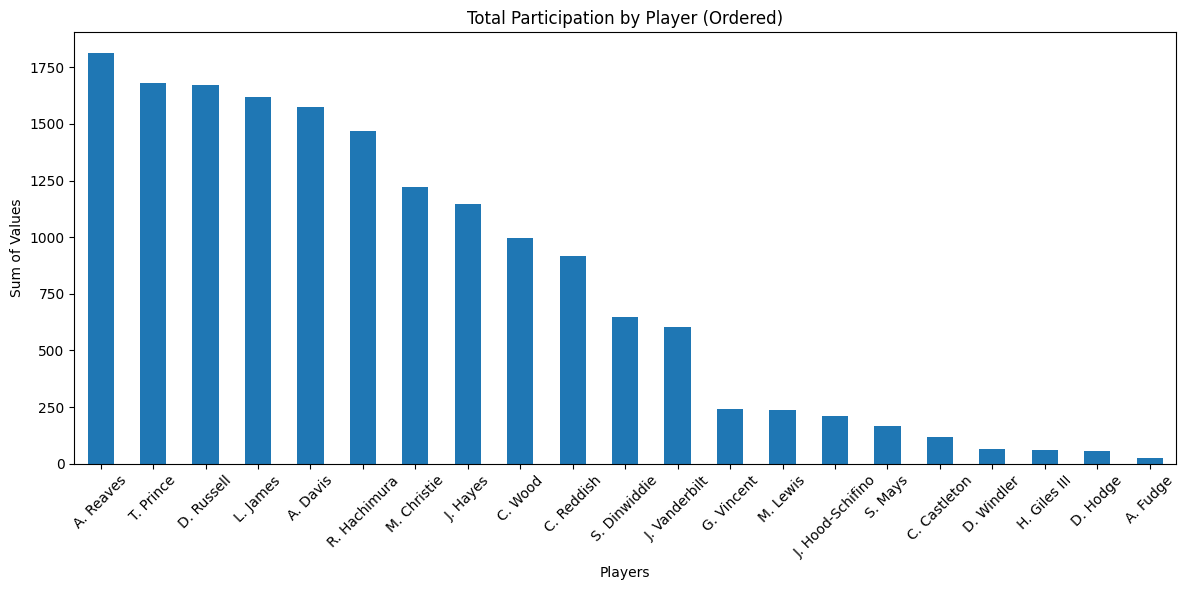

In [27]:
# Calculate the sum for each player column
player_sums = X_final[categorical_features].sum()

# Step 2: Sort the sums in descending order
player_sums = player_sums.sort_values(ascending=False)

# Step 3: Plot the results as a bar chart
plt.figure(figsize=(12, 6))
player_sums.plot(kind='bar')

# Step 4: Add labels and title
plt.title('Total Participation by Player (Ordered)')
plt.xlabel('Players')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45)  # Rotate player names for better readability
plt.tight_layout()

# Step 5: Show the chart
plt.show()


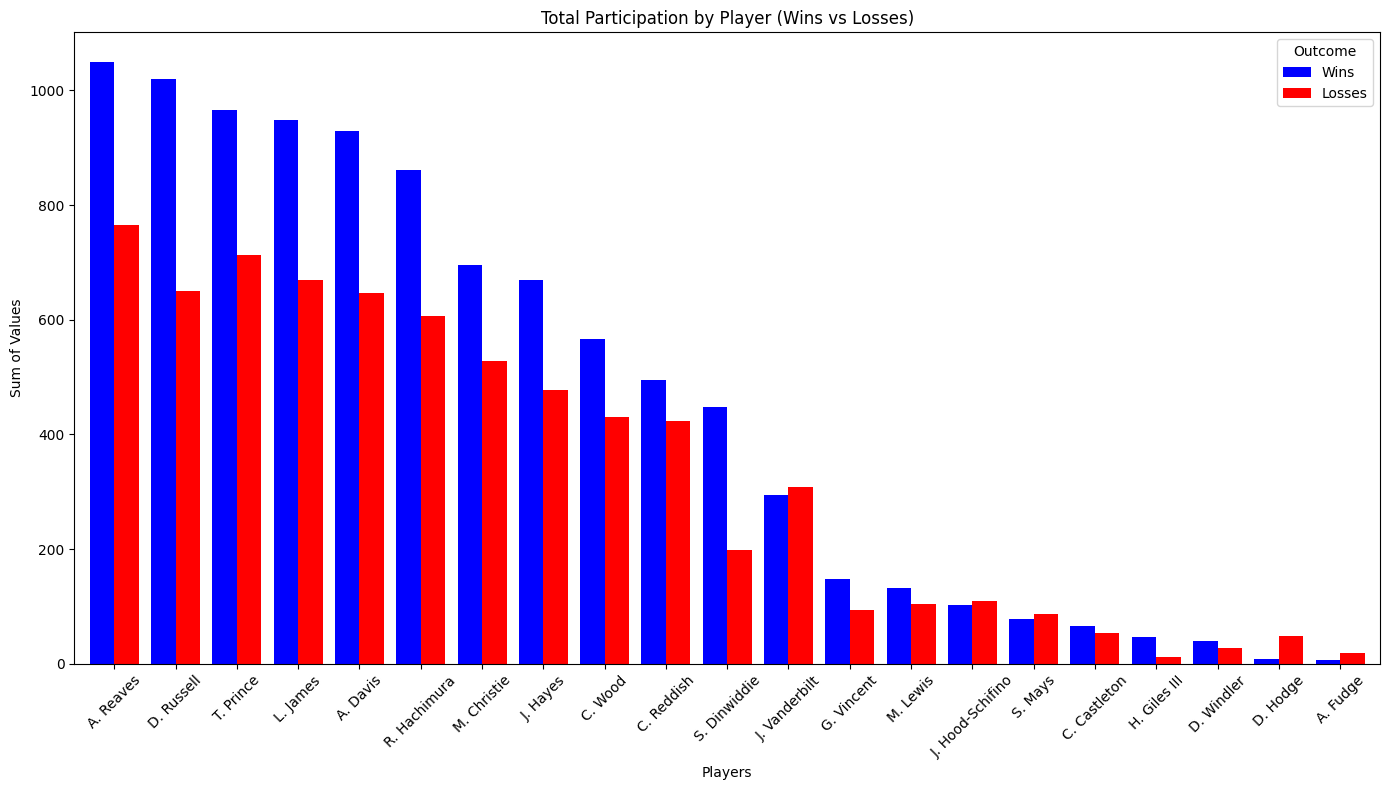

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by 'WIN' and calculate the sum for each player column
player_sums_win = X_final[y == 1][categorical_features].sum()  # Sums for wins
player_sums_loss = X_final[y == 0][categorical_features].sum()  # Sums for losses

# Combine the sums into a single DataFrame for plotting
player_sums = pd.DataFrame({
    'Wins': player_sums_win,
    'Losses': player_sums_loss
}).sort_values(by='Wins', ascending=False)

# Plot the results
ax = player_sums.plot(
    kind='bar',
    figsize=(14, 8),
    color=['blue', 'red'],
    width=0.8
)

# Add labels and title
plt.title('Total Participation by Player (Wins vs Losses)')
plt.xlabel('Players')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45)  # Rotate player names for better readability
plt.legend(title="Outcome")
plt.tight_layout()

# Show the chart
plt.show()


In [29]:
X_final_dropped = X_final.drop(columns=['A. Fudge', 'D. Hodge', 'H. Giles III', 'D. Windler'])
X_final_dropped.head()

,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,A. Davis,A. Reaves,C. Castleton,C. Reddish,C. Wood,D. Russell,G. Vincent,J. Hayes,J. Hood-Schifino,J. Vanderbilt,L. James,M. Christie,M. Lewis,R. Hachimura,S. Dinwiddie,S. Mays,T. Prince
0,3.203963,0.013483,0.464190,-0.327597,0.140725,0.065144,-0.075058,0.415251,0.007307,0.004853,-0.288574,-0.284298,-0.259031,-0.126601,-0.135937,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.131345,0.262291,0.256630,0.005918,0.181201,0.807437,0.168835,0.280411,0.010698,0.070457,-0.288574,0.085057,0.085415,-0.085229,0.033878,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1.824882,0.315754,0.470417,-0.110284,0.159406,0.536527,0.139567,0.051182,-0.091053,-0.126356,-0.288574,0.193690,0.204058,-0.103935,-0.016294,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.824882,0.315754,0.470417,-0.110284,0.159406,0.536527,0.139567,0.051182,-0.091053,-0.126356,-0.288574,0.193690,0.204058,-0.103935,-0.016294,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1.671651,0.430904,0.221345,0.155321,0.227904,1.170456,0.363948,-0.196025,0.153150,-0.140414,-0.288574,0.345777,0.303564,-0.098290,0.035164,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [112]:
offensive_col = ['DEFRTG', 'DREB%', 'REB%', 'NETRTG','AST%', 'AST/TO', 'AST RATIO', 'TO RATIO'
]

defensive_col = ['OFFRTG', 'OREB%', 'EFG%', 'TS%', 'PACE', 'PIE','AST%', 'AST/TO', 'AST RATIO', 'TO RATIO'
]

playmake_col = ['OFFRTG', 'OREB%', 'EFG%', 'TS%', 'PACE', 'PIE','DEFRTG', 'DREB%', 'REB%', 'NETRTG'
]

off = X_final_dropped.copy(deep=True)
defe = X_final_dropped.copy(deep=True)
play = X_final_dropped.copy(deep=True)

In [113]:
offensive_X = off.drop(columns=offensive_col)
defensive_X = defe.drop(columns=defensive_col)
playmake_X = play.drop(columns=playmake_col)
offensive_X.head()

,MIN,OFFRTG,OREB%,EFG%,TS%,PACE,PIE,A. Davis,A. Reaves,C. Castleton,C. Reddish,C. Wood,D. Russell,G. Vincent,J. Hayes,J. Hood-Schifino,J. Vanderbilt,L. James,M. Christie,M. Lewis,R. Hachimura,S. Dinwiddie,S. Mays,T. Prince
0,3.203963,0.013483,0.415251,-0.284298,-0.259031,-0.126601,-0.135937,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.131345,0.262291,0.280411,0.085057,0.085415,-0.085229,0.033878,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1.824882,0.315754,0.051182,0.193690,0.204058,-0.103935,-0.016294,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.824882,0.315754,0.051182,0.193690,0.204058,-0.103935,-0.016294,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1.671651,0.430904,-0.196025,0.345777,0.303564,-0.098290,0.035164,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [49]:
variances = X_final.var()
print(variances.sort_values())

A. Fudge            0.004334
D. Hodge            0.010230
H. Giles III        0.010586
D. Windler          0.012003
C. Castleton        0.021289
S. Mays             0.029029
J. Hood-Schifino    0.036970
M. Lewis            0.041134
G. Vincent          0.041797
J. Vanderbilt       0.097543
S. Dinwiddie        0.103572
C. Reddish          0.138894
C. Wood             0.148009
J. Hayes            0.164859
M. Christie         0.172613
R. Hachimura        0.195365
A. Davis            0.204219
L. James            0.207346
D. Russell          0.211155
T. Prince           0.211796
A. Reaves           0.220772
AST/TO              1.000181
TO RATIO            1.000181
MIN                 1.000181
AST RATIO           1.000181
REB%                1.000181
PIE                 1.000181
PACE                1.000181
EFG%                1.000181
NETRTG              1.000181
DEFRTG              1.000181
TS%                 1.000181
OFFRTG              1.000181
OREB%               1.000181
DREB%         

#### Check VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Combine your transformed continuous and categorical features
X_combined = pd.concat([X_transformed_df, X[categorical_features]], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_combined.columns
vif_data['VIF'] = [variance_inflation_factor(X_combined.values, i) for i in range(X_combined.shape[1])]

# Display VIF scores
print(vif_data)


             Feature           VIF
0                MIN  1.683752e+00
1             OFFRTG  1.718142e+06
2             DEFRTG  1.686243e+06
3             NETRTG  3.189809e+06
4               AST%  4.492688e+00
5             AST/TO  1.483311e+00
6          AST RATIO  7.593057e+00
7              OREB%  2.767651e+00
8              DREB%  3.377074e+00
9               REB%  5.177437e+00
10          TO RATIO  1.545905e+00
11              EFG%  9.907145e+00
12               TS%  1.405478e+01
13              PACE  1.107995e+00
14               PIE  1.391034e+00
15          A. Davis  1.330021e+00
16          A. Fudge  1.153420e+00
17         A. Reaves  1.272508e+00
18      C. Castleton  1.134268e+00
19        C. Reddish  1.123921e+00
20           C. Wood  1.157742e+00
21          D. Hodge  1.167019e+00
22        D. Russell  1.258242e+00
23        D. Windler  1.090713e+00
24        G. Vincent  1.047236e+00
25      H. Giles III  1.116720e+00
26          J. Hayes  1.214597e+00
27  J. Hood-Schifino

In [34]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_final.columns
vif_data['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Display VIF scores
print(vif_data)

             Feature           VIF
0                MIN  1.683752e+00
1             OFFRTG  1.718142e+06
2             DEFRTG  1.686243e+06
3             NETRTG  3.189809e+06
4               AST%  4.492688e+00
5             AST/TO  1.483311e+00
6          AST RATIO  7.593057e+00
7              OREB%  2.767651e+00
8              DREB%  3.377074e+00
9               REB%  5.177437e+00
10          TO RATIO  1.545905e+00
11              EFG%  9.907145e+00
12               TS%  1.405478e+01
13              PACE  1.107995e+00
14               PIE  1.391034e+00
15          A. Davis  1.330021e+00
16          A. Fudge  1.153420e+00
17         A. Reaves  1.272508e+00
18      C. Castleton  1.134268e+00
19        C. Reddish  1.123921e+00
20           C. Wood  1.157742e+00
21          D. Hodge  1.167019e+00
22        D. Russell  1.258242e+00
23        D. Windler  1.090713e+00
24        G. Vincent  1.047236e+00
25      H. Giles III  1.116720e+00
26          J. Hayes  1.214597e+00
27  J. Hood-Schifino

# All Stats

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final_dropped, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistic Regression

In [36]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [37]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



Optimization terminated successfully.
         Current function value: 0.646404
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                 4412
Model:                          Logit   Df Residuals:                     4379
Method:                           MLE   Df Model:                           32
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                 0.05042
Time:                        21:09:54   Log-Likelihood:                -2851.9
converged:                       True   LL-Null:                       -3003.4
Covariance Type:            nonrobust   LLR p-value:                 7.422e-46
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7550      0.481     -1.569      0.117      -1.698       0.188
MIN        

Decision Trees

In [38]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40, 50, 100, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### XGBoost

In [41]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 40, 'subsample': 0.8}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.62
Recall (Sensitivity): 0.80
F1 Score: 0.70
AUC-ROC: 0.63
Log Loss: 0.67
Normalized Confusion Matrix: [[0.3311828  0.6688172 ]
 [0.20062696 0.79937304]]


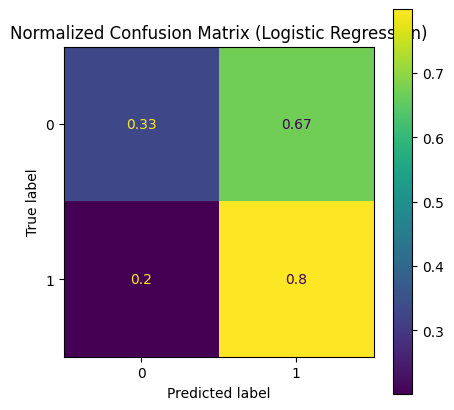

In [42]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

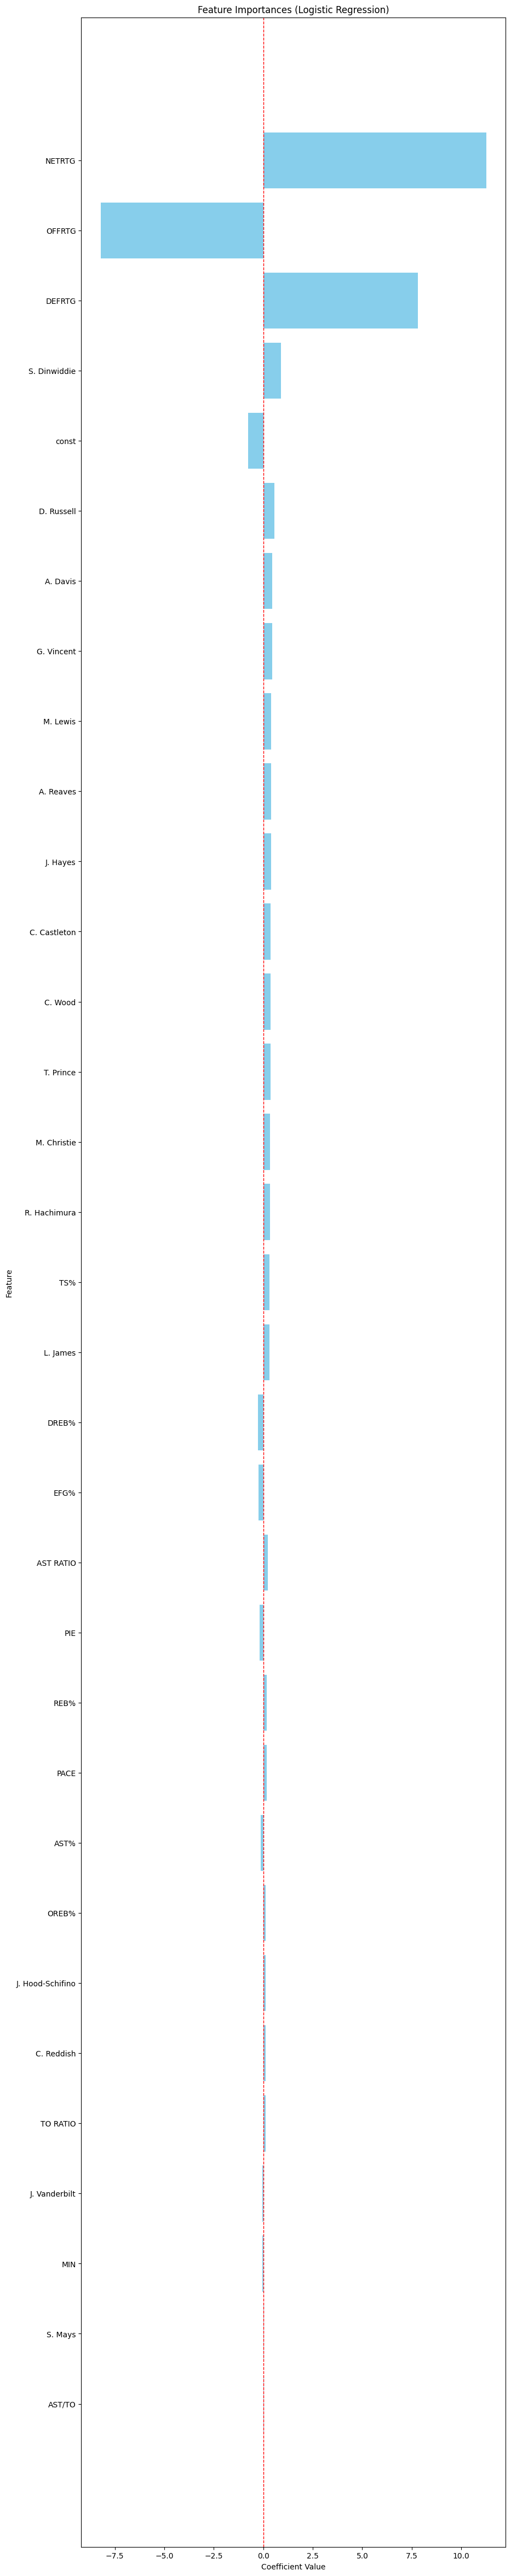

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature coefficients from the model
coefficients = logit_model.params  # Use `model.coef_` if using sklearn logistic regression

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    "Feature": coefficients.index,  # Feature names
    "Importance": coefficients.values  # Coefficients
}).sort_values(by="Importance", ascending=False, key=np.abs)  # Sort by absolute importance

# Plot feature importances
plt.figure(figsize=(10, 60))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importances (Logistic Regression)")
plt.axvline(0, color="red", linestyle="--", linewidth=1)  # Vertical line at 0 for reference
plt.gca().invert_yaxis()  # Most important feature on top
plt.show()


Confusion Matrix:
[[154 311]
 [126 512]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.33      0.41       465
           1       0.62      0.80      0.70       638

    accuracy                           0.60      1103
   macro avg       0.59      0.57      0.56      1103
weighted avg       0.59      0.60      0.58      1103

F1 Score: 0.70
ROC AUC Score: 0.63
Precision: 0.62
Recall: 0.80


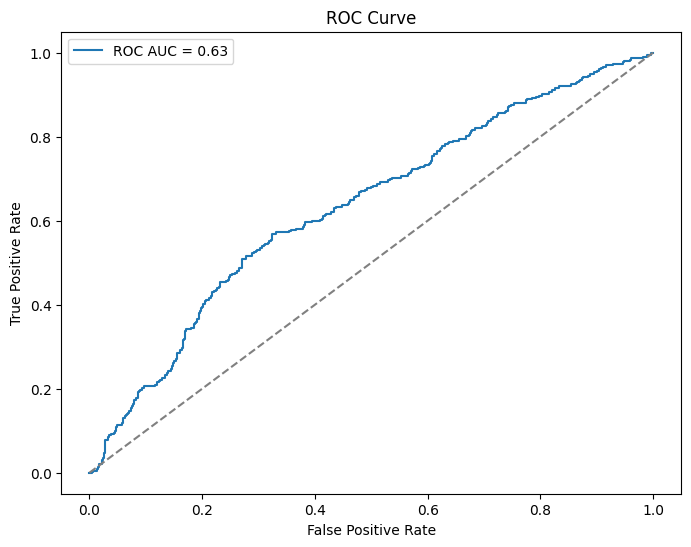

In [44]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [46]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': X_final_dropped.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

,Feature,Coefficient,Importance
29,S. Dinwiddie,0.780832,0.780832
20,D. Russell,0.461111,0.461111
15,A. Davis,0.336066,0.336066
21,G. Vincent,0.326801,0.326801
12,TS%,0.311001,0.311001
2,DEFRTG,-0.282247,0.282247
16,A. Reaves,0.278725,0.278725
22,J. Hayes,0.273535,0.273535
8,DREB%,-0.272884,0.272884
27,M. Lewis,0.270697,0.270697


### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1.0}

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=5,
    n_estimators=30,
    subsample=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Offensive Stats Only

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(offensive_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [73]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [74]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



Optimization terminated successfully.
         Current function value: 0.663905
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                 4412
Model:                          Logit   Df Residuals:                     4387
Method:                           MLE   Df Model:                           24
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                 0.02471
Time:                        22:23:59   Log-Likelihood:                -2929.1
converged:                       True   LL-Null:                       -3003.4
Covariance Type:            nonrobust   LLR p-value:                 6.533e-20
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8396      0.472     -1.778      0.075      -1.765       0.086
MIN        

Decision Trees

In [75]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}


### XGBoost

In [78]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40,100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.60
Recall (Sensitivity): 0.86
F1 Score: 0.70
AUC-ROC: 0.59
Log Loss: 0.69
Normalized Confusion Matrix: [[0.20430108 0.79569892]
 [0.14263323 0.85736677]]


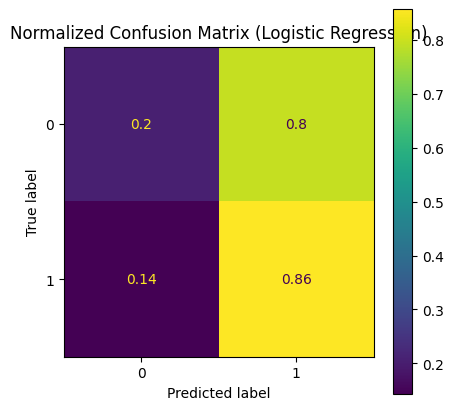

In [79]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[ 95 370]
 [ 92 546]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.20      0.29       465
           1       0.60      0.86      0.70       638

    accuracy                           0.58      1103
   macro avg       0.55      0.53      0.50      1103
weighted avg       0.56      0.58      0.53      1103

F1 Score: 0.70
ROC AUC Score: 0.59
Precision: 0.60
Recall: 0.86


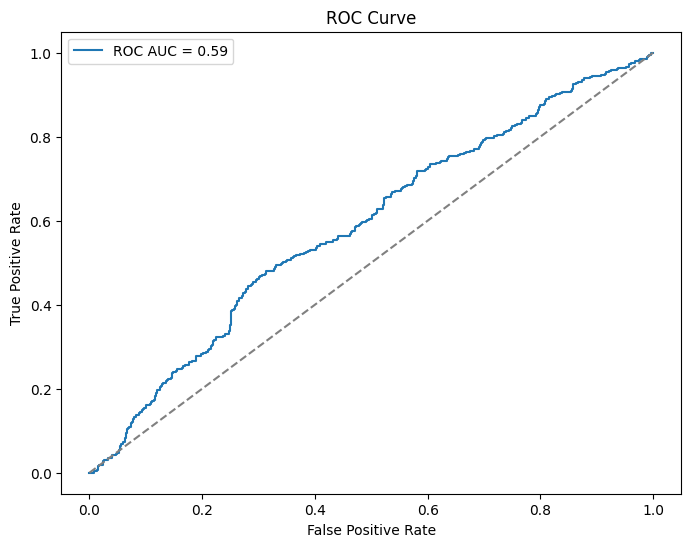

In [80]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [81]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': offensive_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

,Feature,Coefficient,Importance
21,S. Dinwiddie,0.755983,0.755983
19,M. Lewis,0.462703,0.462703
12,D. Russell,0.441842,0.441842
7,A. Davis,0.363229,0.363229
13,G. Vincent,0.355569,0.355569
5,PACE,0.346308,0.346308
14,J. Hayes,0.288372,0.288372
8,A. Reaves,0.281904,0.281904
11,C. Wood,0.276001,0.276001
18,M. Christie,0.263579,0.263579


### Decision Trees


Decision Tree Metrics:
Precision: 0.73
Recall (Sensitivity): 0.55
F1 Score: 0.63
AUC-ROC: 0.65
Log Loss: 0.64
Normalized Confusion Matrix: [[0.72903226 0.27096774]
 [0.45297806 0.54702194]]


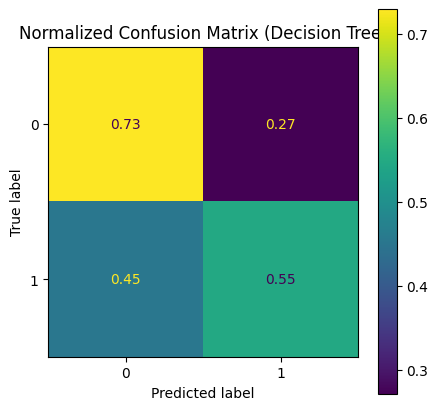

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest


Random Forest Metrics:
Precision: 0.75
Recall (Sensitivity): 0.83
F1 Score: 0.78
AUC-ROC: 0.82
Log Loss: 0.54
Normalized Confusion Matrix: [[0.61505376 0.38494624]
 [0.17398119 0.82601881]]


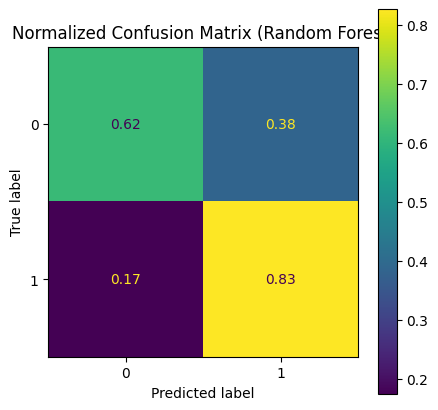

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=30,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost


XGBoost Metrics:
Precision: 0.58
Recall (Sensitivity): 1.00
F1 Score: 0.73
AUC-ROC: 0.69
Log Loss: 0.65
Normalized Confusion Matrix: [[0. 1.]
 [0. 1.]]


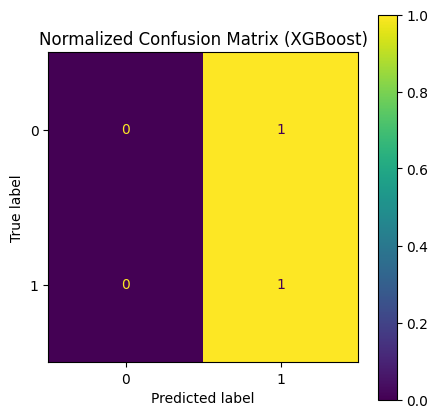

In [84]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=40,
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Defensive Stats

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(defensive_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [115]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [116]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



Optimization terminated successfully.
         Current function value: 0.652235
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                 4412
Model:                          Logit   Df Residuals:                     4389
Method:                           MLE   Df Model:                           22
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.04185
Time:                        00:28:24   Log-Likelihood:                -2877.7
converged:                       True   LL-Null:                       -3003.4
Covariance Type:            nonrobust   LLR p-value:                 7.611e-41
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4324      0.469     -0.922      0.357      -1.352       0.487
MIN        

Decision Trees

In [117]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [118]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10}


### Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}


### XGBoost

In [120]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40,100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.62
Recall (Sensitivity): 0.81
F1 Score: 0.70
AUC-ROC: 0.62
Log Loss: 0.66
Normalized Confusion Matrix: [[0.31827957 0.68172043]
 [0.19122257 0.80877743]]


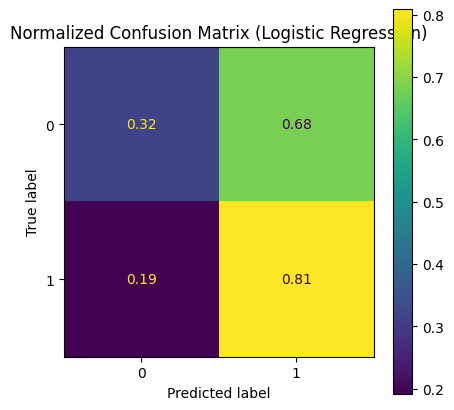

In [121]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[146 319]
 [122 516]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.40       465
           1       0.62      0.81      0.70       638

    accuracy                           0.60      1103
   macro avg       0.58      0.56      0.55      1103
weighted avg       0.59      0.60      0.57      1103

F1 Score: 0.70
ROC AUC Score: 0.63
Precision: 0.62
Recall: 0.81


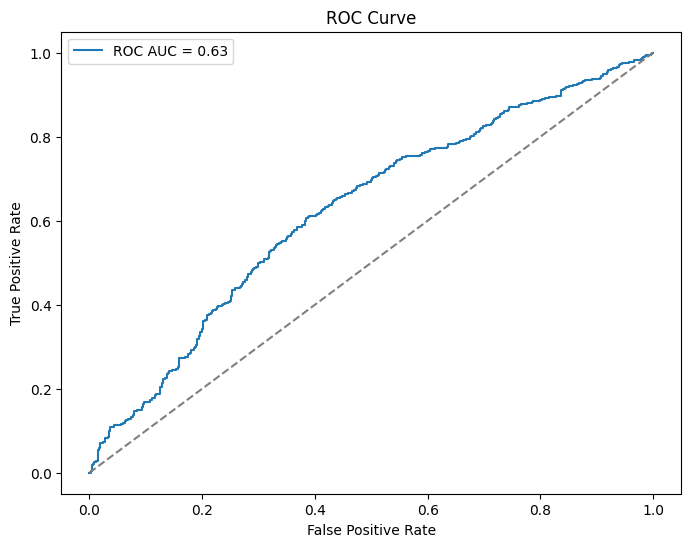

In [122]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [123]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': defensive_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

,Feature,Coefficient,Importance
19,S. Dinwiddie,0.722196,0.722196
10,D. Russell,0.386582,0.386582
3,DREB%,-0.353669,0.353669
4,REB%,0.324628,0.324628
5,A. Davis,0.260631,0.260631
11,G. Vincent,0.259536,0.259536
1,DEFRTG,-0.237624,0.237624
17,M. Lewis,0.210349,0.210349
12,J. Hayes,0.199184,0.199184
6,A. Reaves,0.193380,0.193380


### Decision Trees


Decision Tree Metrics:
Precision: 0.63
Recall (Sensitivity): 0.86
F1 Score: 0.73
AUC-ROC: 0.66
Log Loss: 0.64
Normalized Confusion Matrix: [[0.30537634 0.69462366]
 [0.13636364 0.86363636]]


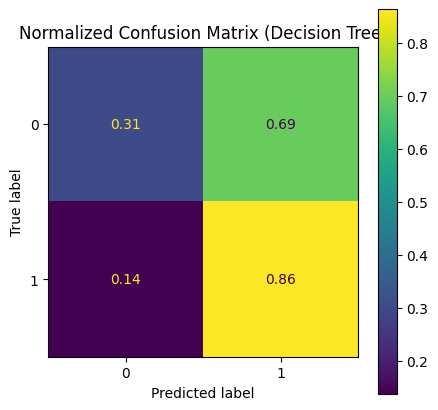

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest


Random Forest Metrics:
Precision: 0.67
Recall (Sensitivity): 0.82
F1 Score: 0.74
AUC-ROC: 0.72
Log Loss: 0.62
Normalized Confusion Matrix: [[0.45591398 0.54408602]
 [0.18495298 0.81504702]]


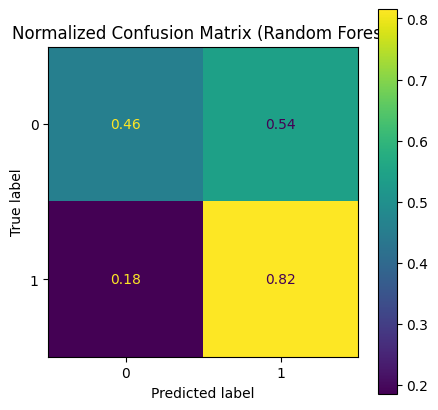

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=40,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost


XGBoost Metrics:
Precision: 0.63
Recall (Sensitivity): 0.90
F1 Score: 0.74
AUC-ROC: 0.70
Log Loss: 0.64
Normalized Confusion Matrix: [[0.29247312 0.70752688]
 [0.10344828 0.89655172]]


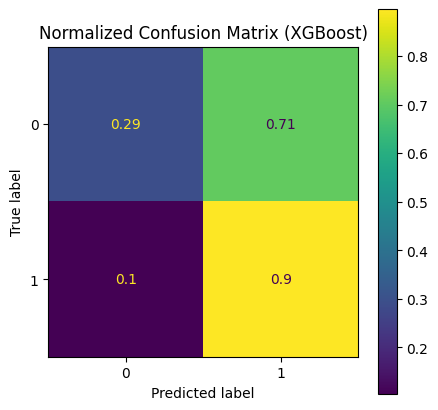

In [126]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Playmaking Stats

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(playmake_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [128]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [129]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



Optimization terminated successfully.
         Current function value: 0.667087
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                 4412
Model:                          Logit   Df Residuals:                     4389
Method:                           MLE   Df Model:                           22
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.02003
Time:                        00:33:08   Log-Likelihood:                -2943.2
converged:                       True   LL-Null:                       -3003.4
Covariance Type:            nonrobust   LLR p-value:                 1.516e-15
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8696      0.466     -1.865      0.062      -1.783       0.044
MIN        

Decision Trees

In [130]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [131]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


### Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40, 50, 100, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### XGBoost

In [133]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 40, 'subsample': 0.8}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.61
Recall (Sensitivity): 0.88
F1 Score: 0.72
AUC-ROC: 0.59
Log Loss: 0.67
Normalized Confusion Matrix: [[0.2172043  0.7827957 ]
 [0.12225705 0.87774295]]


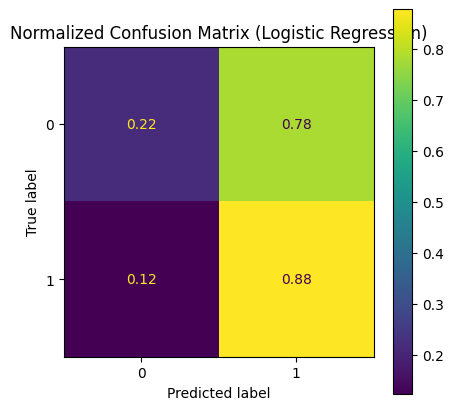

In [134]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[102 363]
 [ 76 562]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.22      0.32       465
           1       0.61      0.88      0.72       638

    accuracy                           0.60      1103
   macro avg       0.59      0.55      0.52      1103
weighted avg       0.59      0.60      0.55      1103

F1 Score: 0.72
ROC AUC Score: 0.59
Precision: 0.61
Recall: 0.88


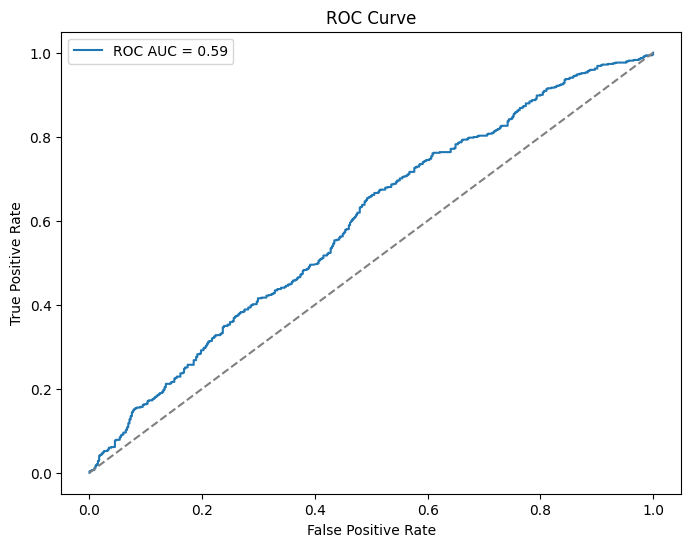

In [135]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [136]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': playmake_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

,Feature,Coefficient,Importance
19,S. Dinwiddie,0.789108,0.789108
10,D. Russell,0.461801,0.461801
5,A. Davis,0.393887,0.393887
11,G. Vincent,0.391647,0.391647
17,M. Lewis,0.331019,0.331019
6,A. Reaves,0.304413,0.304413
3,AST RATIO,0.290970,0.290970
9,C. Wood,0.280717,0.280717
21,T. Prince,0.276387,0.276387
16,M. Christie,0.271917,0.271917


### Decision Trees


Decision Tree Metrics:
Precision: 0.59
Recall (Sensitivity): 0.98
F1 Score: 0.73
AUC-ROC: 0.61
Log Loss: 0.66
Normalized Confusion Matrix: [[0.0516129  0.9483871 ]
 [0.02037618 0.97962382]]


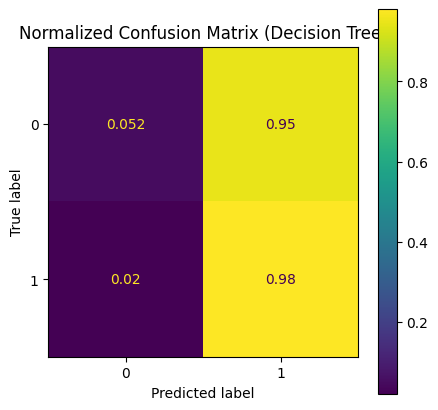

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest


Random Forest Metrics:
Precision: 0.66
Recall (Sensitivity): 0.89
F1 Score: 0.75
AUC-ROC: 0.74
Log Loss: 0.61
Normalized Confusion Matrix: [[0.35913978 0.64086022]
 [0.11285266 0.88714734]]


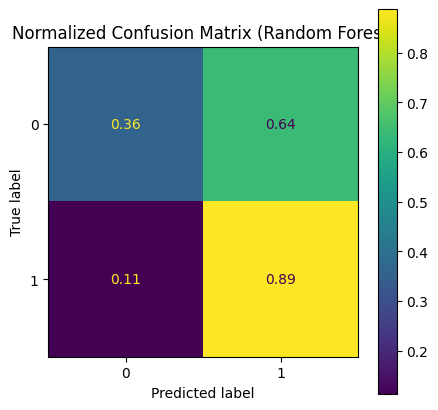

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=20,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost


XGBoost Metrics:
Precision: 0.65
Recall (Sensitivity): 0.89
F1 Score: 0.75
AUC-ROC: 0.71
Log Loss: 0.62
Normalized Confusion Matrix: [[0.33548387 0.66451613]
 [0.10971787 0.89028213]]


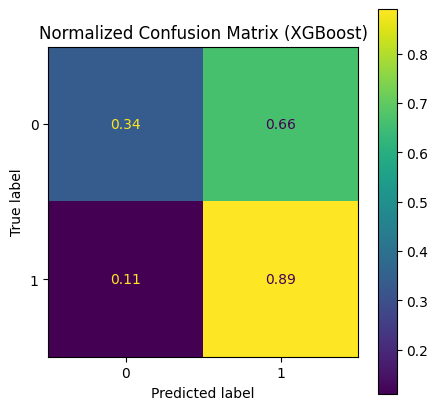

In [139]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=30,
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# EXTRA

In [140]:
# Updated model comparison DataFrame with all metrics rounded to 3 decimals
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "LightGBM",
        "XGBoost",
        "Neural Network"
    ],
    "Precision": [
        round(precision, 3),
        round(precision_tree, 3),
        round(precision_rf_model, 3),
        round(precision_xgb, 3)
    ],
    "Recall": [
        round(recall, 3),
        round(recall_tree, 3),
        round(recall_rf_model, 3),
        round(recall_xgb, 3)
    ],
    "F1 Score": [
        round(f1, 3),
        round(f1_tree, 3),
        round(f1_rf_model, 3)
        round(f1_xgb, 3)
    ],
    "AUC-ROC": [
        round(auc_roc, 3),
        round(auc_roc_tree, 3),
        round(auc_roc_rf_model, 3)
        round(auc_roc_xgb, 3)
    ],
    "Log Loss": [
        round(logloss, 3),
        round(logloss_tree, 3),
        round(logloss_rf_model, 3)
        round(logloss_xgb, 3)
    ]
})

# Display the updated DataFrame
print(model_comparison)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-140-f54d381128ac>, line 26)

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt


In [ ]:
# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualizations
# 1. Summary Plot
shap.summary_plot(shap_values, X_test)

# 2. Force Plot for the first prediction
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

# 3. Bar Plot for feature importance
shap.plots.bar(shap_values)

# 4. Dependence Plot for a specific feature
shap.dependence_plot('GP', shap_values.values, X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Logistic Regression with L1 Regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_prob_lasso = lasso_model.predict_proba(X_test)[:, 1]

# Logistic Regression with L2 Regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_prob_ridge = ridge_model.predict_proba(X_test)[:, 1]

# Evaluate L1 and L2 models
def evaluate_model(y_test, y_pred, y_pred_prob, model_name):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    logloss = log_loss(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred, normalize="true")

    print(f"\n{model_name} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print(f"Log Loss: {logloss:.2f}")
    print(f"Normalized Confusion Matrix: \n{cm}")

    # Display normalized confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cmd.plot(ax=ax)
    plt.title(f"Normalized Confusion Matrix ({model_name})")
    plt.show()

evaluate_model(y_test, y_pred_lasso, y_pred_prob_lasso, "Lasso (L1)")
evaluate_model(y_test, y_pred_ridge, y_pred_prob_ridge, "Ridge (L2)")
